<a href="https://colab.research.google.com/github/tbbcoach/DS_Unit2_BW_Submission/blob/main/Unit_2_Build_Week_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders
    !pip install pdpbox
    !pip install shap

In [31]:
from google.colab import files
upload = files.upload()

Saving Augmented_avocado.csv to Augmented_avocado (2).csv


KeyboardInterrupt: ignored

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#remove insignificant columns

df_avocado = pd.read_csv('Augmented_avocado.csv')
df_avocado = df_avocado.drop(columns=['Unnamed: 0', 'year'])
df_avocado.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,4/23/2017,1.324522,363844.11950,2086.305830,15297.247530,-513.654410,7256.068788,11363.872180,4579.307742,-1.727795,organic,Roanoke
1,3/29/2015,1.297376,412844.36890,29015.676120,88103.386590,2253.702012,49380.191010,29907.237220,4365.884161,54.793735,conventional,SanFrancisco
2,2/18/2018,1.469304,75577.23102,25218.753760,19653.059330,-748.277093,31900.310560,12429.538810,-167.238374,-84.541301,organic,Louisville
3,11/15/2015,1.681869,71767.40793,4466.005801,-8540.909251,-1087.310466,16692.401790,-5718.985732,25867.196990,-33.232127,organic,Albany
4,6/21/2015,1.334113,77935.77408,866.915215,8097.743815,1260.251319,-6184.326714,63516.027520,2879.525730,-20.586030,organic,SanFrancisco
5,11/29/2015,1.358713,357712.28520,-448.055684,97576.187840,15117.673710,27649.796900,58794.482460,1727.953699,-75.726105,conventional,GrandRapids
6,9/25/2016,1.232836,440851.60440,8230.957900,4290.935098,14053.879530,91186.041510,52505.623830,-1911.009512,-54.894004,conventional,GrandRapids
7,9/17/2017,1.620551,55740.90589,-18901.979000,11176.774450,297.006553,3443.224406,-3634.746216,3013.629862,-52.799743,organic,HartfordSpringfield
8,4/30/2017,1.927136,250991.29210,14570.566940,24412.999560,-119.098441,12313.177650,39538.596870,31800.920990,-71.062627,organic,Nashville
9,9/25/2016,1.808766,72094.05057,3685.547568,10240.267330,1299.093415,12675.800620,10081.945320,11156.495100,115.250072,organic,Jacksonville


In [34]:
#set date  as index

df_avocado.sort_values(by='Date')
df_avocado['Date'] = pd.to_datetime(df_avocado['Date'])
df_avocado.set_index('Date', inplace=True)

df_avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2017-04-23,1.324522,363844.11950,2086.305830,15297.247530,-513.654410,7256.068788,11363.872180,4579.307742,-1.727795,organic,Roanoke
2015-03-29,1.297376,412844.36890,29015.676120,88103.386590,2253.702012,49380.191010,29907.237220,4365.884161,54.793735,conventional,SanFrancisco
2018-02-18,1.469304,75577.23102,25218.753760,19653.059330,-748.277093,31900.310560,12429.538810,-167.238374,-84.541301,organic,Louisville
2015-11-15,1.681869,71767.40793,4466.005801,-8540.909251,-1087.310466,16692.401790,-5718.985732,25867.196990,-33.232127,organic,Albany
2015-06-21,1.334113,77935.77408,866.915215,8097.743815,1260.251319,-6184.326714,63516.027520,2879.525730,-20.586030,organic,SanFrancisco


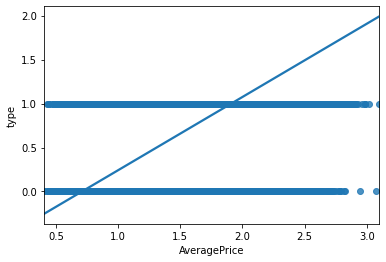

In [ ]:
#Visualize any linear relationships 
ax = sns.regplot(x='AveragePrice', y='type', data = df_avocado)
# ax = sns.regplot(x='AveragePrice', y='Total Bags', data = df_avocado)

In [35]:
#add categorical column 'cheap' based on mean average price

df_avocado['AveragePrice'].mean()
df_avocado['cheap'] = df_avocado['AveragePrice'] < 1.32
df_avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,cheap
Date,,,,,,,,,,,,
2017-04-23,1.324522,363844.11950,2086.305830,15297.247530,-513.654410,7256.068788,11363.872180,4579.307742,-1.727795,organic,Roanoke,False
2015-03-29,1.297376,412844.36890,29015.676120,88103.386590,2253.702012,49380.191010,29907.237220,4365.884161,54.793735,conventional,SanFrancisco,True
2018-02-18,1.469304,75577.23102,25218.753760,19653.059330,-748.277093,31900.310560,12429.538810,-167.238374,-84.541301,organic,Louisville,False
2015-11-15,1.681869,71767.40793,4466.005801,-8540.909251,-1087.310466,16692.401790,-5718.985732,25867.196990,-33.232127,organic,Albany,False
2015-06-21,1.334113,77935.77408,866.915215,8097.743815,1260.251319,-6184.326714,63516.027520,2879.525730,-20.586030,organic,SanFrancisco,False


In [36]:
df_avocado.sort_index(inplace=True)
df_avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,cheap
Date,,,,,,,,,,,,
2015-01-04,1.067238,8.694930e+05,729092.893800,25351.679260,660.521162,1.004203e+05,774572.742800,4584.245287,77.808862,conventional,Denver,True
2015-01-04,1.182851,3.392160e+05,-7126.278994,6343.190422,1744.733838,9.164930e+04,52417.214690,64292.280390,-81.501851,conventional,RichmondNorfolk,True
2015-01-04,1.010103,1.003913e+06,135920.046900,-10453.171510,38183.923930,1.283991e+06,33320.804220,32274.971970,23.954434,conventional,GrandRapids,True
2015-01-04,2.037675,4.684201e+04,-10791.423870,-11870.226400,130.504001,5.344330e+03,-10284.410800,4903.903353,-71.976916,organic,NorthernNewEngland,False
2015-01-04,2.631752,-2.936871e+04,-8290.207744,-29400.868240,825.060689,-5.818334e+03,1083.105122,1356.634473,-116.180783,organic,WestTexNewMexico,False


In [37]:
print(df_avocado.iloc[[599999]])
print(df_avocado.iloc[[600000]])
print(df_avocado.iloc[[799999]])

            AveragePrice  Total Volume        4046  ...     type    region  cheap
Date                                                ...                          
2016-12-11      1.449804   6327.226697  242.450193  ...  organic  SanDiego  False

[1 rows x 12 columns]
            AveragePrice  Total Volume  ...         region  cheap
Date                                    ...                      
2016-12-11      1.046408   480200.0276  ...  SouthCarolina   True

[1 rows x 12 columns]
            AveragePrice  Total Volume  ...         region  cheap
Date                                    ...                      
2017-07-30       1.00404   266342.4285  ...  SouthCarolina   True

[1 rows x 12 columns]


In [38]:
#splt data into train ,validate, and test data using a cutoff date and masks and target

target = 'type'

y= df_avocado[target]
X = df_avocado.drop(columns=target)

cutoff = '2016-12-11'
cutoff2 = '2017-7-30'
mask1 = X.index <= cutoff
mask2 = (X.index > cutoff) & (X.index <= cutoff2)
mask3 = X.index > cutoff2
X_train, y_train = X.loc[mask1], y.loc[mask1]
X_val, y_val = X.loc[mask2], y.loc[mask2]
X_test, y_test = X.loc[mask3], y.loc[mask3]

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


((604568, 11), (604568,), (198084, 11), (198084,), (197348, 11), (197348,))

In [ ]:
cutoff = 1.33
df_avocado['cheap'] = df_avocado.AveragePrice.apply(lambda x: 0 if x <= cutoff else 1)
df_avocado['type'] = df_avocado['type'].apply(lambda x: 0 if x == 'conventional' else 1)
df_avocado.type.astype(float)

df_avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,cheap
Date,,,,,,,,,,,,
2015-01-04,1.067238,8.694930e+05,729092.893800,25351.679260,660.521162,1.004203e+05,774572.742800,4584.245287,77.808862,0,Denver,0
2015-01-04,1.182851,3.392160e+05,-7126.278994,6343.190422,1744.733838,9.164930e+04,52417.214690,64292.280390,-81.501851,0,RichmondNorfolk,0
2015-01-04,1.010103,1.003913e+06,135920.046900,-10453.171510,38183.923930,1.283991e+06,33320.804220,32274.971970,23.954434,0,GrandRapids,0
2015-01-04,2.037675,4.684201e+04,-10791.423870,-11870.226400,130.504001,5.344330e+03,-10284.410800,4903.903353,-71.976916,1,NorthernNewEngland,1
2015-01-04,2.631752,-2.936871e+04,-8290.207744,-29400.868240,825.060689,-5.818334e+03,1083.105122,1356.634473,-116.180783,1,WestTexNewMexico,1


In [ ]:
df_avocado['type'].dtype

dtype('int64')

In [39]:
#calculate baseline score
from sklearn.metrics import accuracy_score

y_train.value_counts(normalize=True)
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

baseline_acc = accuracy_score(y_train, y_pred)

print('Baseline score = ', baseline_acc)


Baseline score =  0.5131482314644507


In [40]:
#Build a model using Random Forest to determine impact of 'region'

from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

model_rf = make_pipeline(
    OneHotEncoder(),
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators = 50, n_jobs = -1, max_depth = 5, random_state = 42)

)

model_rf.fit(X_train, y_train)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['region'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=5, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                             

In [ ]:
#check results

train_acc = model_rf.score(X_train, y_train)
val_acc = model_rf.score(X_val, y_val)
test_acc = model_rf.score(X_test, y_test)

print('Training accuracy_score = ', train_acc)
print('Validation accuracy score = ', val_acc)
print('Test accuracy score = ', test_acc)

Training accuracy_score =  0.9008233978642601
Validation accuracy score =  0.9011580945457482
Test accuracy score =  0.9037993797758275


In [ ]:
#Model prediction versus test set.


y_pred = model_rf.predict(X_test)
print(y_pred[197330:])
print(y_test[197330:])


['conventional' 'conventional' 'conventional' 'organic' 'conventional'
 'conventional' 'conventional' 'organic' 'organic' 'organic'
 'conventional' 'conventional' 'conventional' 'conventional' 'organic'
 'conventional' 'conventional' 'conventional']
Date
2018-03-25    conventional
2018-03-25    conventional
2018-03-25    conventional
2018-03-25         organic
2018-03-25    conventional
2018-03-25    conventional
2018-03-25    conventional
2018-03-25         organic
2018-03-25         organic
2018-03-25    conventional
2018-03-25    conventional
2018-03-25    conventional
2018-03-25         organic
2018-03-25    conventional
2018-03-25         organic
2018-03-25    conventional
2018-03-25    conventional
2018-03-25    conventional
Name: type, dtype: object


In [ ]:
#baseline for logistic regression

y_train.value_counts(normalize=True)

y_train.value_counts(normalize=True)
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

baseline_acc = accuracy_score(y_train, y_pred)

print('Baseline score = ', baseline_acc)

Baseline score =  0.5131482314644507


In [ ]:
#build logistic regression

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.impute import SimpleImputer

# le = LabelEncoder()
# le.fit(y_train)

model_type_lr = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression()
)

model_type_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['region'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', rand

In [ ]:
training_acc = model_type_lr.score(X_train, y_train)
val_acc = model_type_lr.score(X_val, y_val)
test_acc = model_type_lr.score(X_test, y_test)

print('Training MAE:', training_acc)
print('Validation MAE:', val_acc)
print('Test MAE:', test_acc)

Training MAE: 0.8489566103399452
Validation MAE: 0.8506997031562368
Test MAE: 0.8514806331961814


region_PhoenixTucson         -0.002515
region_BaltimoreWashington    0.002563
region_Atlanta               -0.002762
region_HarrisburgScranton    -0.002995
region_NewOrleansMobile       0.003036
                                ...   
4770                         -1.074201
AveragePrice                  1.219537
Total Volume                 -1.348637
4046                         -2.272585
4225                         -3.908664
Length: 64, dtype: float64


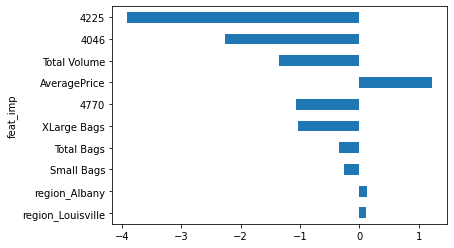

In [ ]:
#important features in determining organic or conventional avocados.


coefficients = model_type_lr.named_steps['logisticregression'].coef_[0]
features = model_type_lr.named_steps['onehotencoder'].get_feature_names()
feat_imp = pd.Series(coefficients, index=features).sort_values(key=abs)
feat_imp.tail(10).plot(kind='barh', ylabel = 'feat_imp');
print(feat_imp)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f89479ce210>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f894463d310>})

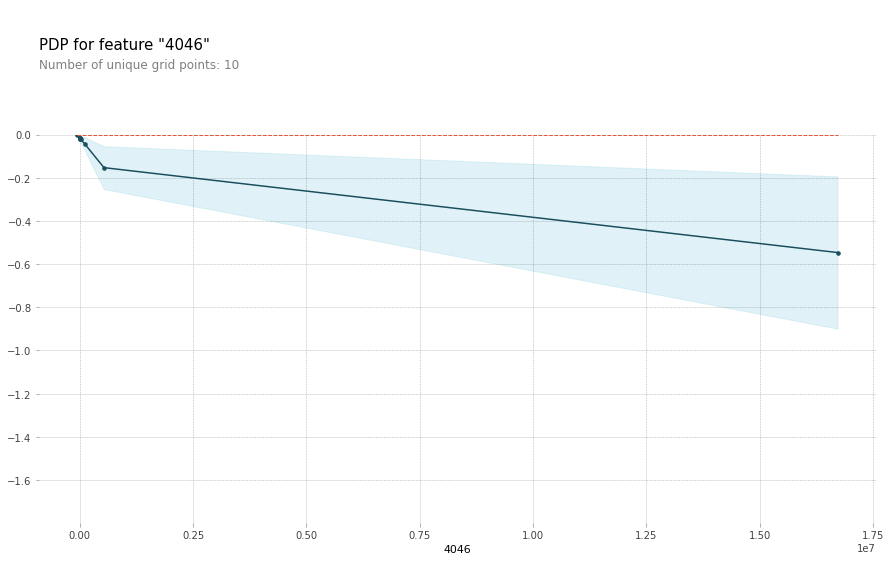

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

from pdpbox.pdp import pdp_isolate, pdp_plot


feature = '4046'
isolated = pdp_isolate(
    model= model_type_lr, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature

)

pdp_plot(isolated, feature_name=feature)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f8944947390>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f8944184cd0>})

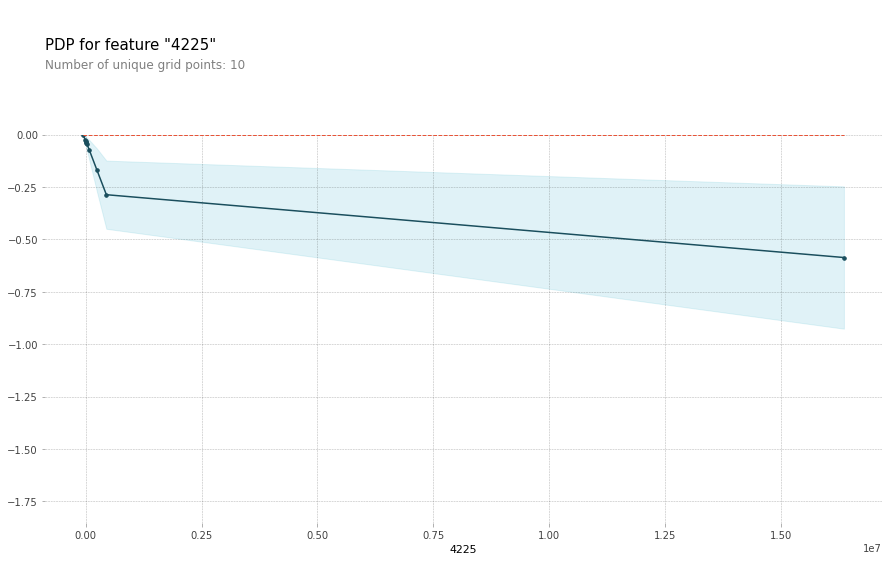

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

from pdpbox.pdp import pdp_isolate, pdp_plot


feature = '4225'
isolated = pdp_isolate(
    model= model_type_lr, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature

)

pdp_plot(isolated, feature_name=feature)

In [41]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

features = ['4225', '4046', 'Total Volume', 'AveragePrice', '4770', 'XLarge Bags' ]
target = 'type'
X_train_search = X_train[features]
y_train_search = y_train
X_test_search = X_test[features]
y_test_search = y_test

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train_search, y_train_search);


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 10.6min
A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 36.4min finished


In [42]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': 15, 'max_features': 0.020584494295802447, 'n_estimators': 307}
Cross-validation MAE -0.8954989347765677


In [43]:
row = X_test_search.iloc[[0]]
row

,4225,4046,Total Volume,AveragePrice,4770,XLarge Bags
Date,,,,,,
2017-08-06,-15674.57426,7816.492401,53525.266,1.456114,1160.68911,111.883756


In [44]:
y_test.iloc[[0]]

Date
2017-08-06    organic
Name: type, dtype: object

In [45]:
model.predict(row)

array(['organic'], dtype=object)

In [46]:
import shap

In [47]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
#shap values are what the features contribute to the final predicted value 


shap.initjs()
shap.force_plot(base_value=explainer.expected_value[1], 
                shap_values=shap_values[1], 
                features=row)

In [48]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
#shap values are what the features contribute to the final predicted value 


shap.initjs()
shap.force_plot(base_value=explainer.expected_value[0], 
                shap_values=shap_values[0], 
                features=row)

In [ ]:
#Blog link   https://medium.com/@timothycpettit/avocados-organic-vs-conventional-c823bb9f013f